In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
cd ml-100k

C:\Users\tyadav\Downloads\ml-100k


In [3]:
# Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('ml-100k/u.user', sep='|', names=u_cols,encoding='latin-1')

In [4]:
# Reading rating files:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings= pd.read_csv('ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

In [5]:
# Reading Item file:
i_cols = ['movie id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')

In [6]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_train = pd.read_csv('ml-100k/ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ml-100k/ua.test', sep='\t', names=r_cols, encoding='latin-1')
ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [7]:
class MF():
    # Initializing the user-movie rating matrix,
    # number of latent features, alpha and beta
    
    def __init__(self, R, K, alpha, beta, iterations):
        self.R = R
        self.num_users, self.num_items = R.shape
        self.K = K
        self.alpha = alpha
        self.beta = beta
        self.iterations = iterations
        
    # Initializing user-features and movie-feature matrix
    def train(self):
        self.P = np.random.normal(scale=1./self.K, size = (self.num_users, self.K))
        self.Q = np.random.normal(scale=1./self.K, size = (self.num_items, self.K))
        
        # Initializing the bias terms
        
        self.b_u = np.zeros(self.num_users)
        self.b_i = np.zeros(self.num_items)
        self.b = np.mean(self.R[np.where(self.R != 0)])
        
        
        # List of training samples
        self.samples = [
        (i, j, self.R[i, j])
        for i in range(self.num_users)
            for j in range(self.num_items)
            if self.R[i, j] > 0
            ]
        # Stochastic gradient descent for given number of iterations
        
        training_process = []
        for i in range(self.iterations):
            np.random.shuffle(self.samples)
            self.sgd()
            mse = self.mse()
            training_process.append((i, mse))
            if (i+1) % 20 == 0:
                print("Iteration: %d ; error = %.4f" %(i+1, mse))
            
        return training_process
    
    # Computing total mean squared error
    
    def mse(self):
        xs, ys = self.R.nonzero()
        predicted = self.full_matrix()
        error = 0
        for x, y in zip(xs, ys):
            error += pow(self.R[x, y] - predicted[x, y], 2)
        return np.sqrt(error)
    
    # Stochastic Gradient Descent to get optimized P and Q matrix
    
    def sgd(self):
        for i, j, r in self.samples:
            prediction = self.get_rating(i, j)
            e = (r-prediction)
            
            self.b_u[i] += self.alpha * (e-self.beta*self.b_u[i])
            self.b_i[j] += self.alpha * (e-self.beta*self.b_i[i])
            
            self.P[i,:] += self.alpha*(e*self.Q[j,:] - self.beta*self.P[i,:])
            self.Q[j,:] += self.alpha*(e*self.P[i,:] - self.beta*self.Q[j,:])
            
            
    # Rating for user i and movie j
    def get_rating(self, i, j):
        prediction = self.b + self.b_u[i] + self.b_i[j] + self.P[i,:].dot(self.Q[j,:].T)
        return prediction
    
    # Full user-movie rating matrix
    def full_matrix(self):
        return mf.b + mf.b_u[:,np.newaxis] + mf.b_i[np.newaxis,:] + mf.P.dot(mf.Q.T)

In [8]:
R= np.array(ratings_train.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0))
acc = []
acc2 = []
acc3 = []
pred = []

In [9]:
for k in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 90, 95, 100]:
    print("For k = %d" %(k))
    mf = MF(R, K=k, alpha=0.01, beta=0.01, iterations=500)
    training_process = mf.train()
    print()
    print("P x Q:")
    print(mf.full_matrix())
    print()
    op = mf.full_matrix()
    for i in range(len(ratings_test)):
        pred.append(op[ratings_test.user_id[i]-1, ratings_test.movie_id[i]-1])
    predict = np.array(pred)
    acc.append(np.mean(np.round(predict) == ratings_test.rating))
    acc2.append((np.mean(np.ceil(predict) == ratings_test.rating)))
    acc3.append((np.mean(np.floor(predict) == ratings_test.rating)))
    pred = []


For k = 5
Iteration: 20 ; error = 249.2643
Iteration: 40 ; error = 236.7287
Iteration: 60 ; error = 232.6713
Iteration: 80 ; error = 230.7903
Iteration: 100 ; error = 229.7074
Iteration: 120 ; error = 229.0714
Iteration: 140 ; error = 228.6152
Iteration: 160 ; error = 228.2397
Iteration: 180 ; error = 227.9621
Iteration: 200 ; error = 227.7910
Iteration: 220 ; error = 227.5734
Iteration: 240 ; error = 227.4757
Iteration: 260 ; error = 227.3440
Iteration: 280 ; error = 227.1864
Iteration: 300 ; error = 227.1505
Iteration: 320 ; error = 227.0414
Iteration: 340 ; error = 226.9072
Iteration: 360 ; error = 226.8680
Iteration: 380 ; error = 226.8253
Iteration: 400 ; error = 226.7727
Iteration: 420 ; error = 226.6875
Iteration: 440 ; error = 226.6575
Iteration: 460 ; error = 226.5771
Iteration: 480 ; error = 226.6250
Iteration: 500 ; error = 226.5319

P x Q:
[[3.90506027 3.04769839 2.60595658 ... 3.02970831 3.56416294 3.11650874]
 [3.65329543 2.88080824 1.76491593 ... 3.62830805 3.44645085 3.

Iteration: 220 ; error = 108.3487
Iteration: 240 ; error = 107.7386
Iteration: 260 ; error = 107.1785
Iteration: 280 ; error = 106.7184
Iteration: 300 ; error = 106.2914
Iteration: 320 ; error = 105.9762
Iteration: 340 ; error = 105.6104
Iteration: 360 ; error = 105.3431
Iteration: 380 ; error = 105.0375
Iteration: 400 ; error = 104.8237
Iteration: 420 ; error = 104.6111
Iteration: 440 ; error = 104.3945
Iteration: 460 ; error = 104.2040
Iteration: 480 ; error = 104.0339
Iteration: 500 ; error = 103.8621

P x Q:
[[4.72547236 2.73157104 4.09775731 ... 3.15158763 3.60759737 3.40200465]
 [4.19171547 2.41259273 3.92919694 ... 3.33572084 3.74258799 3.67330831]
 [2.38886199 0.99811601 4.03176879 ... 2.77188557 2.93357758 2.83511608]
 ...
 [5.01195479 3.31380956 3.58824429 ... 3.23480476 3.66795947 3.56700727]
 [4.32304115 3.42371672 4.01179941 ... 3.88852814 3.824278   3.96993185]
 [0.58105364 4.62000697 2.65169803 ... 2.79197195 3.20177798 3.01654271]]

For k = 40
Iteration: 20 ; error = 20

Iteration: 500 ; error = 45.2716

P x Q:
[[4.77241957 3.09985551 3.89412209 ... 3.07780788 3.42846876 3.33160726]
 [4.06742124 3.26251163 3.1487092  ... 3.41016986 3.57683241 3.50137023]
 [3.09136027 1.83849448 1.20034536 ... 2.8523253  2.98582117 2.9522596 ]
 ...
 [4.99807269 3.52119537 3.48373552 ... 3.32253451 3.71128065 3.6072547 ]
 [4.2436232  4.49177371 5.06752928 ... 3.4480156  3.980416   3.92122824]
 [3.30316625 5.01355077 2.17390715 ... 3.23427184 3.36573061 3.31570545]]

For k = 75
Iteration: 20 ; error = 205.5001
Iteration: 40 ; error = 100.7124
Iteration: 60 ; error = 70.6524
Iteration: 80 ; error = 59.6220
Iteration: 100 ; error = 54.1742
Iteration: 120 ; error = 50.9697
Iteration: 140 ; error = 48.8637
Iteration: 160 ; error = 47.3749
Iteration: 180 ; error = 46.2734
Iteration: 200 ; error = 45.3919
Iteration: 220 ; error = 44.7096
Iteration: 240 ; error = 44.1319
Iteration: 260 ; error = 43.6408
Iteration: 280 ; error = 43.2488
Iteration: 300 ; error = 42.8732
Iteration:

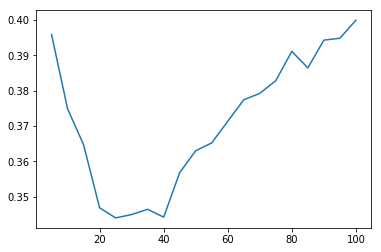

In [10]:
plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 90, 95, 100], acc)

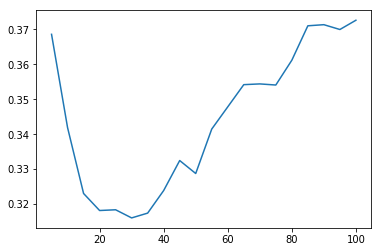

In [11]:
plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 90, 95, 100], acc2)

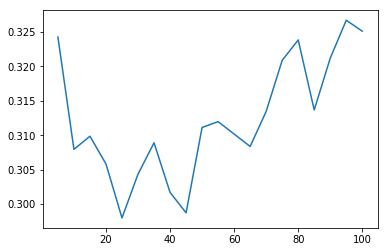

In [12]:
plt.plot([5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 90, 95, 100], acc3)    

In [17]:
acc

[0.395864262990456,
 0.37486744432661717,
 0.36468716861081657,
 0.34687168610816543,
 0.3440084835630965,
 0.3449628844114528,
 0.3464475079533404,
 0.34422057264050904,
 0.35683987274655354,
 0.3629904559915164,
 0.3652173913043478,
 0.37741251325556735,
 0.3792152704135737,
 0.3828207847295864,
 0.3910922587486744,
 0.38642629904559916,
 0.39427359490986214,
 0.39480381760339345,
 0.39989395546129375]